### Muhammad Usman
##### p190096@nu.edu.pk

In [3]:
import pandas as pd
import numpy as np

## Step 1

In [8]:
df = pd.read_csv("data.csv",index_col='ID')
df.head(10) 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4


In [12]:
df.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
ID                                                                      
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
7    0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   b

In [15]:
df.shape

(333, 14)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

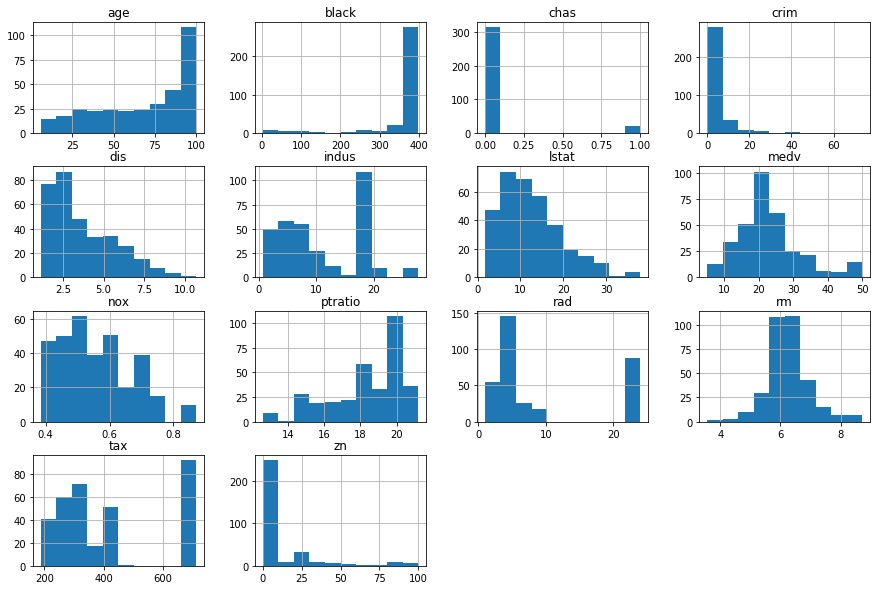

In [20]:
df.hist(figsize=(15, 10))
plt.show()

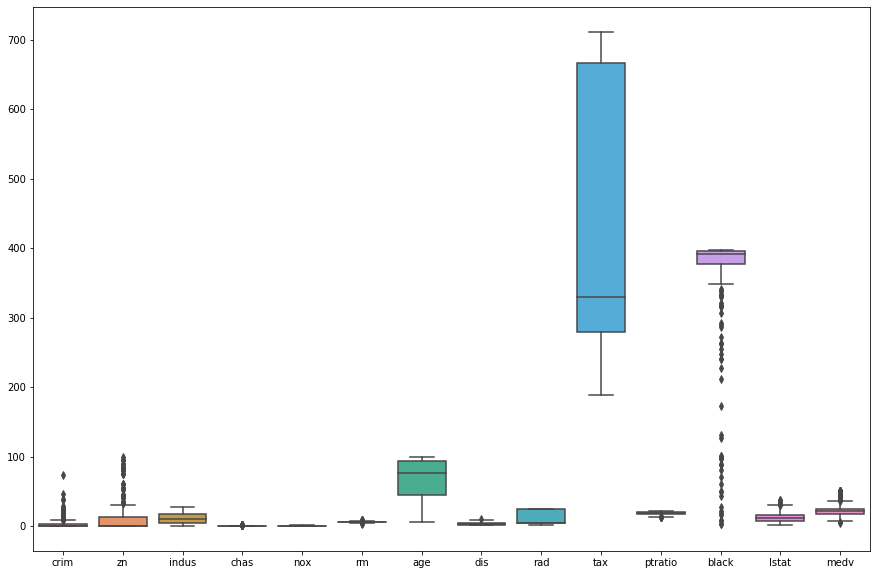

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

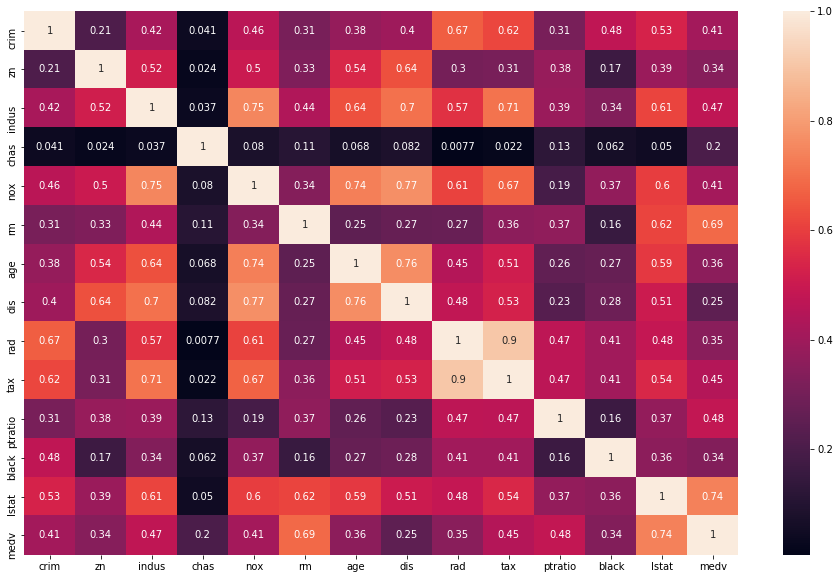

In [32]:
plt.figure(figsize=(16, 10))
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Step 2

In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3

In [38]:
# Handle missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [39]:
# Perform feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 5

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 23.48673519542582
R-squared (R^2): 0.7390315860425438
